In [3]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.rcParams['figure.figsize'] = (12,6)
plt.rc('font', family='Arial')
# plt.style.use('ggplot')

np.set_printoptions(suppress=True)

Выборка с равновероятными исходами.

In [4]:
sample = np.random.choice([1, 2, 3, 4, 5, 6], 100)

In [7]:
from collections import Counter
from pprint import pprint

c = Counter(sample)

Число выпадений каждой из сторон.

In [13]:
pprint(c)

Counter({4: 22, 5: 21, 3: 19, 2: 13, 6: 13, 1: 12})


Вероятность каждого исхода.

In [14]:
pprint({k: v/100.0 for k, v in c.items()})

{1: 0.12, 2: 0.13, 3: 0.19, 4: 0.22, 5: 0.21, 6: 0.13}


### Непрерывное распределение

In [15]:
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)

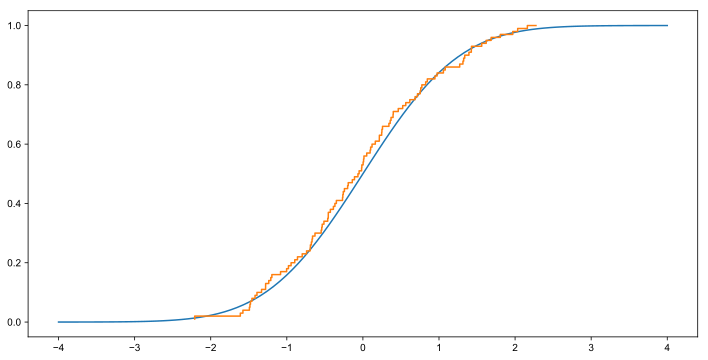

In [17]:
x = np.linspace(-4, 4, 100)

cdf = norm_rv.cdf(x)  # функция распределения
_ = plt.plot(x, cdf, label="theoretical CDF")

from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)  # эмпирическая ф. распределения
_ = plt.step(ecdf.x, ecdf.y, label="ECDF")

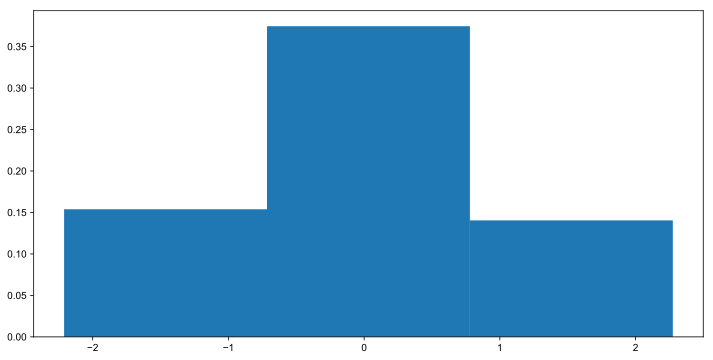

In [28]:
_ = plt.hist(sample, normed=True, bins=3)

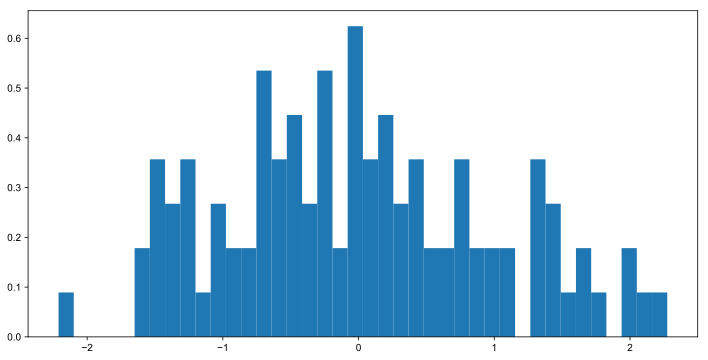

In [29]:
_ = plt.hist(sample, normed=True, bins=40)

Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания.

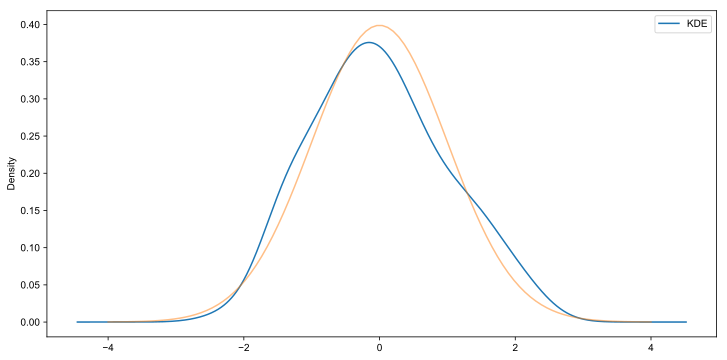

In [30]:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# теоретическая плотность распределения
pdf = norm_rv.pdf(x)  # плотность распределения
_ = plt.plot(x, pdf, label='Threoretical PDF', alpha=0.5)

### Нормальное распределение.

array([ 2.40813112,  1.45555452,  2.67376657, ...,  2.22155725,
        3.1062384 ,  2.19839677])

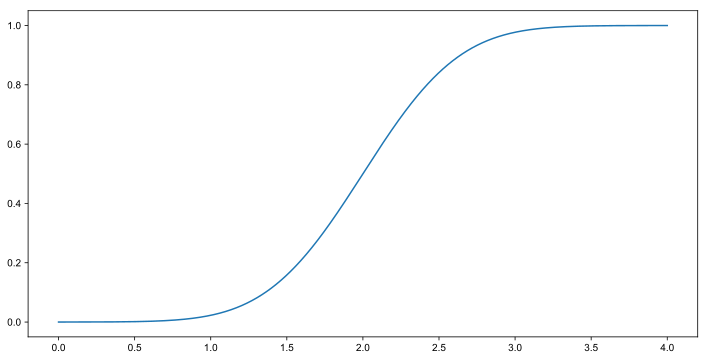

In [49]:
mu = 2.0
sigma = 0.5
count = 10000

norm_rv = sts.norm(loc=mu, scale=sigma)
norm_rv.rvs(size=count)

x = np.linspace(0, 4, count)
X = norm_rv.cdf(x)

_ = plt.plot(x, X)

In [42]:
norm_rv.cdf(3)

0.9986501019683699

Плотность распределения.

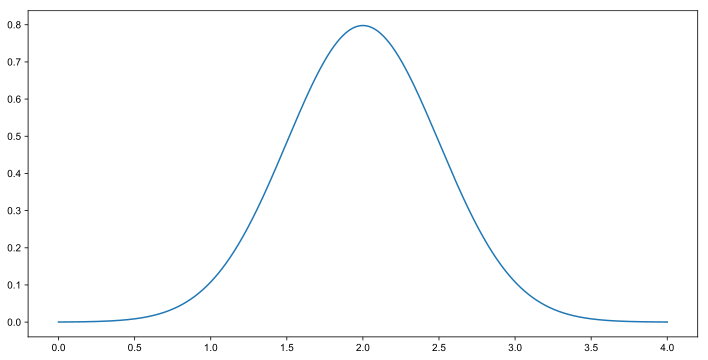

In [50]:
pdf = norm_rv.pdf(x)

_ = plt.plot(x, pdf)

### Равномерное распределение на отрезке.

array([ 3.46391361,  3.38336542,  2.57179467,  2.6899587 ,  2.26454657,
        1.89856222,  3.10716373,  1.91399126,  2.69870957,  3.83752267])

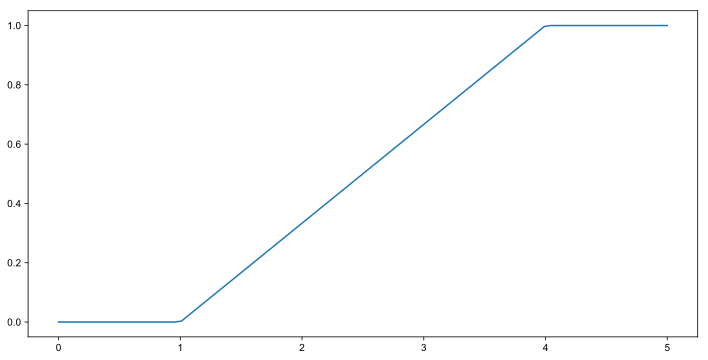

In [64]:
x = np.linspace(0, 5, 100)

uniform_rv = sts.uniform(loc=1, scale=3)
uniform_rv.rvs(10)

_ = plt.plot(x, uniform_rv.cdf(x))

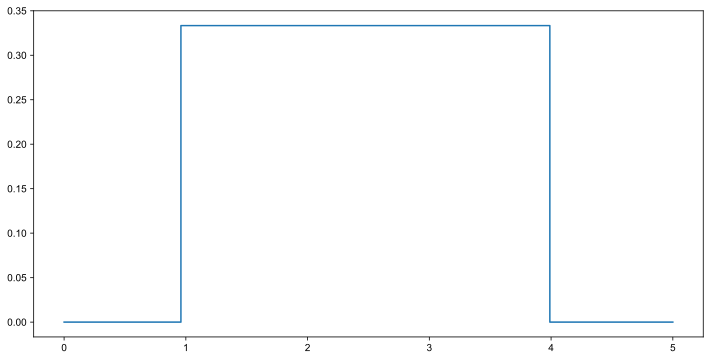

In [66]:
pdf = uniform_rv.pdf(x)
_ = plt.step(x, pdf)

### Распределение Бернулли

In [68]:
bern_rv = sts.bernoulli(p=0.7)
bern_rv.rvs(size=100)

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0])

### Биномиальное распределение

array([12, 13, 15, 13, 15, 11, 16, 16, 13, 11])

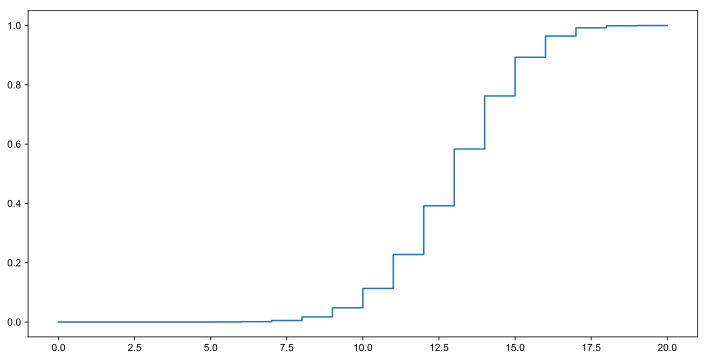

In [71]:
x = np.linspace(0, 20, 21)

binom_rv = sts.binom(20, 0.7)
binom_rv.rvs(10)

cdf = binom_rv.cdf(x)
_ = plt.step(x, cdf)

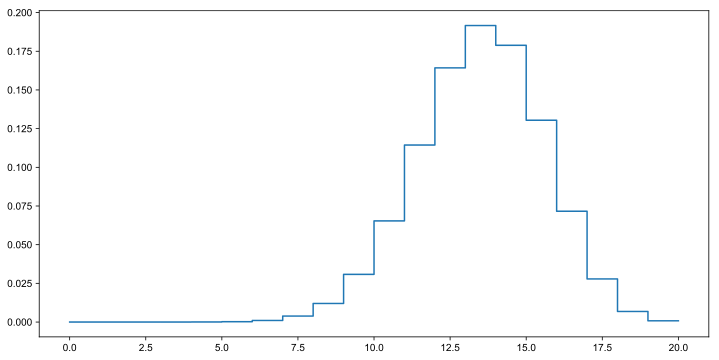

In [75]:
pmf = binom_rv.pmf(x)
_ = plt.step(x, pmf)

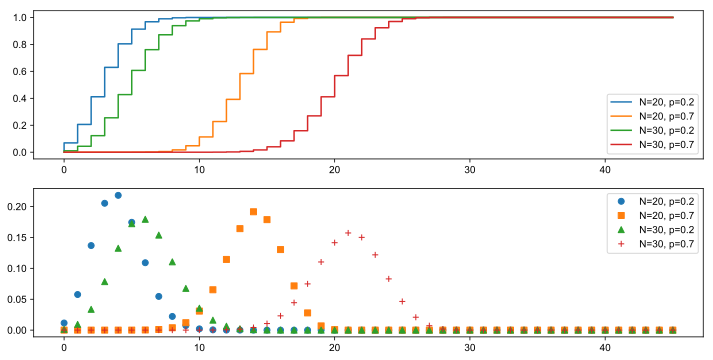

In [82]:
x = np.linspace(0, 45, 46)
fig, ax = plt.subplots(2, 1)
symbols = iter(['o', 's', '^', '+'])
for N in [20, 30]:
    for p in [0.2, 0.7]:
        binom_rv = sts.binom(N, p)
        _ = ax[0].step(x, binom_rv.cdf(x), label=f"N={N}, p={p}")
        _ = ax[1].plot(x, binom_rv.pmf(x), next(symbols), label=f"N={N}, p={p}")
_ = ax[0].legend()
_ = ax[1].legend()

### Распределение Пуассона

In [80]:
puass_rv = sts.poisson(5)
puass_rv.rvs(10)

array([8, 4, 5, 8, 3, 5, 3, 3, 3, 7])

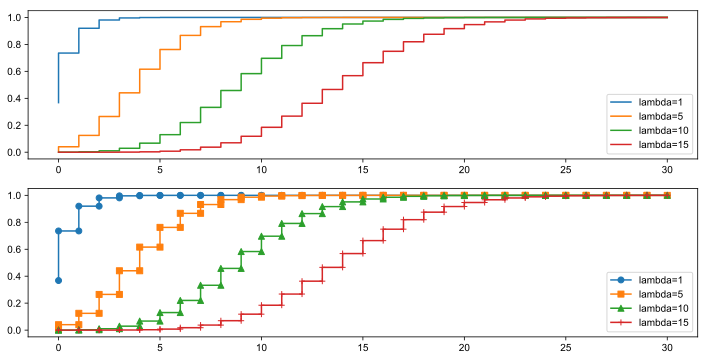

In [86]:
x = np.linspace(0, 30, 31)
fig, ax = plt.subplots(2, 1)
symbols = iter(['o', 's', '^', '+'])
for i in [1, 5, 10, 15]:
    pois_rv = sts.poisson(i)
    _ = ax[0].step(x, pois_rv.cdf(x), label=rf"lambda={i}")
    _ = ax[1].step(x, pois_rv.cdf(x), next(symbols), label=rf"lambda={i}")
_ = ax[0].legend()
_ = ax[1].legend()